In [4]:
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize, TweetTokenizer

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.corpus import wordnet
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [6]:
trainDF = pd.read_csv('train.csv', encoding = 'unicode_escape')
testDF = pd.read_csv('test.csv', encoding = 'unicode_escape')

In [7]:
print(trainDF.shape)
print(testDF.shape)

(27481, 10)
(4815, 9)


In [8]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [9]:
print(trainDF.columns)
print(testDF.columns)

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')
Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')


In [10]:
trainDF.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

# Preprocessing

In [11]:
def preprocessing(df):
    df = df.dropna()
    df = df.drop(['Population -2020','Land Area (Km²)','Density (P/Km²)'], axis =1)
    
    return df

In [12]:
trainDF = preprocessing(trainDF)
testDF = preprocessing(testDF)

In [13]:
trainDF.text

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 27480, dtype: object

In [14]:
regexForRemovingURLs = r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+'

In [15]:
trainDF[trainDF.text.str.match(regexForRemovingURLs)]

textID                                               text  \
5      28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
64     98f25bc596  mannnn..... _ got an iphone!!! im jealous.... ...   
155    b948984e8d                    Mmmmmmmm... ? it in the morning   
201    c017d0c221  http://twitpic.com/66xlm -  hate when my PARKE...   
395    3d635198c2  http://twitpic.com/4sx96 - before they put a C...   
...           ...                                                ...   
27074  871ca31b14  http://wave.google.com/ <3 Google ... wish the...   
27114  556d273874             http://tinyurl.com/cyonct vote for Rob   
27161  039547e4e8  http://twitpic.com/4wdgr - Yay! I`m a blonde a...   
27432  189879e1f2                               Mmmmmm.... Coffee...   
27472  8f5adc47ec  http://twitpic.com/663vr - Wanted to visit the...   

                                           selected_text sentiment  \
5      http://www.dothebouncy.com/smf - some shameles...   neutral   
64                                             jealous..  negative   
155                      Mmmmmmmm... ? it in the morning   neutral   
201                                                 hate  negative   
395    http://twitpic.com/4sx96 - before they put a C...   neutral   
...                                                  ...       ...   
27074                                               wish  positive   
27114                                       vote for Rob   neutral   
27161  http://twitpic.com/4wdgr - Yay! I`m a blonde a...   neutral   
27432                               Mmmmmm.... Coffee...   neutral   
27472                                      were too late  negative   

      Time of Tweet Age of User                 Country  
5             night      70-100     Antigua and Barbuda  
64             noon       60-70                 Germany  
155           night      70-100            Sierra Leone  
201         morning       46-60               Argentina  
395           night      70-100     Antigua and Barbuda  
...             ...         ...                     ...  
27074         night       31-45                  Turkey  
27114       morning        0-20                  Brunei  
27161         night      70-100                  Guyana  
27432       morning        0-20  Bosnia and Herzegovina  
27472          noon       60-70                   Gabon  

[448 rows x 7 columns]

In [16]:
sentences = []
for i in trainDF.text:
    sentences.append(re.sub(regexForRemovingURLs, '', i))

In [17]:
trainDF.text = sentences

In [18]:
trainDF.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
Time of Tweet    0
Age of User      0
Country          0
dtype: int64

In [19]:
testDF

textID                                               text sentiment  \
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1     96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2     eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3     01082688c6                                        happy bday!  positive   
4     33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
...          ...                                                ...       ...   
3529  e5f0e6ef4b  its at 3 am, im very tired but i can`t sleep  ...  negative   
3530  416863ce47  All alone in this old house again.  Thanks for...  positive   
3531  6332da480c   I know what you mean. My little dog is sinkin...  negative   
3532  df1baec676  _sutra what is your next youtube video gonna b...  positive   
3533  469e15c5a8   http://twitpic.com/4woj2 - omgssh  ang cute n...  positive   

     Time of Tweet Age of User          Country  
0          morning        0-20      Afghanistan  
1             noon       21-30          Albania  
2            night       31-45          Algeria  
3          morning       46-60          Andorra  
4             noon       60-70           Angola  
...            ...         ...              ...  
3529          noon       21-30        Nicaragua  
3530         night       31-45            Niger  
3531       morning       46-60          Nigeria  
3532          noon       60-70      North Korea  
3533         night      70-100  North Macedonia  

[3534 rows x 6 columns]

In [20]:
print(trainDF.shape)
print(testDF.shape)

(27480, 7)
(3534, 6)


In [21]:
trainDF

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                               my boss is bullying    
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutral   
1                                               Sooo SAD  negative   
2                                            bullying me  negative   
3                                         leave me alone  negative   
4                                          Sons of ****,  negative   
...                                                  ...       ...   
27476                                             d lost  negative   
27477                                      , don`t force  negative   
27478                          Yay good for both of you.  positive   
27479                         But it was worth it  ****.  positive   
27480  All this flirting going on - The ATG smiles. Y...   neutral   

      Time of Tweet Age of User      Country  
0           morning        0-20  Afghanistan  
1              noon       21-30      Albania  
2             night       31-45      Algeria  
3           morning       46-60      Andorra  
4              noon       60-70       Angola  
...             ...         ...          ...  
27476         night       31-45        Ghana  
27477       morning       46-60       Greece  
27478          noon       60-70      Grenada  
27479         night      70-100    Guatemala  
27480       morning        0-20       Guinea  

[27480 rows x 7 columns]

In [22]:
corpus = trainDF['text'].tolist()
print(len(corpus))

27480


In [23]:
words = word_tokenize(str(corpus))
print("number of words by word_tokenize : {}".format(len(words)))
print(words[0:20])

number of words by word_tokenize : 488962
['[', "'", 'I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going', "'", ',', "'", 'Sooo', 'SAD', 'I', 'will', 'miss']


In [24]:
words2 = wordpunct_tokenize(str(corpus))
print("number of words by wordpunct_tokenize : {}".format(len(words2)))
print(words2[0:20])

words3 = TweetTokenizer().tokenize(str(corpus))
print("number of words by TweetTokenizer : {}".format(len(words3)))
print(words3[0:20])


number of words by wordpunct_tokenize : 457148
["['", 'I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going', "',", "'", 'Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here']
number of words by TweetTokenizer : 501141
['[', "'", 'I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going', "'", ',', "'", 'Sooo', 'SAD', 'I', 'will', 'miss']


In [25]:
import string

def remove_punctuation(txt):
    return"".join([c for c in txt if c not in string.punctuation])
words_without_punctuation = [remove_punctuation(w.lower()) for w in words2 if remove_punctuation(w)!='']

print("number of words after punctuation removing: {}". format(len(words_without_punctuation)))
print(words_without_punctuation[0:20])

number of words after punctuation removing: 354781
['i', 'd', 'have', 'responded', 'if', 'i', 'were', 'going', 'sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego', 'my', 'boss']


In [26]:
from nltk.corpus import stopwords 
from nltk.probability import FreqDist

stop_words= stopwords.words("english")

words_that_are_not_stopwords = [ word for word in words_without_punctuation if word not in stop_words]
fdist_stopwords = FreqDist(words_that_are_not_stopwords)

print("FreqDist with {} samples and {} outcomes".format(len(fdist_stopwords), len(words_that_are_not_stopwords)))
print(words_that_are_not_stopwords[0:20])

FreqDist with 24064 samples and 189927 outcomes
['responded', 'going', 'sooo', 'sad', 'miss', 'san', 'diego', 'boss', 'bullying', 'interview', 'leave', 'alone', 'sons', 'put', 'releases', 'already', 'bought', 'shameless', 'plugging', 'best']


In [27]:
# Define function to lemmatize a single word with its part of speech
def lemmatize_word(word):
    pos = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return WordNetLemmatizer().lemmatize(word, tag_dict.get(pos, wordnet.NOUN))

# Define function to preprocess a single row of text
def preprocess_text(row):
    text = re.sub('[^a-zA-Z]', ' ', row['text'])
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    words = text.split()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words_without_stopwords = [word for word in words if not word in stopwords]
    lemmatized_words = [lemmatize_word(word) for word in words_without_stopwords]
    return ' '.join(lemmatized_words)

# Load the original DataFrame
df = pd.DataFrame(trainDF)

# Apply the preprocessing function to each row of text in the DataFrame
tex = df.apply(preprocess_text, axis=1)
df['text'] = tex

# Create a frequency distribution of lemmatized words
lemmatized_words = [word for text in df['text'] for word in text.split()]
fdist_lemmatized = nltk.FreqDist(lemmatized_words)

data_main = pd.DataFrame()
data_main["text"] = df['text']
data_main["sentiment"] = df["sentiment"].values

In [28]:
data_main

text sentiment
0                                             respond go   neutral
1                                sooo sad miss san diego  negative
2                                           bos bullying  negative
3                                  interview leave alone  negative
4                         son put release already bought  negative
...                                                  ...       ...
27476  wish could come see u denver husband lose job ...  negative
27477  wonder rake client make clear net force devs l...  negative
27478  yay good enjoy break probably need hectic week...  positive
27479                                              worth  positive
27480                         flirt go atg smile yay hug   neutral

[27480 rows x 2 columns]

In [29]:
data_main['Time of Tweet'] = trainDF['Time of Tweet']
data_main['Age of User'] = trainDF['Age of User']
data_main['Country'] = trainDF['Country']
data_main_train = data_main     #Final train data

In [30]:
data_main_train

text sentiment  \
0                                             respond go   neutral   
1                                sooo sad miss san diego  negative   
2                                           bos bullying  negative   
3                                  interview leave alone  negative   
4                         son put release already bought  negative   
...                                                  ...       ...   
27476  wish could come see u denver husband lose job ...  negative   
27477  wonder rake client make clear net force devs l...  negative   
27478  yay good enjoy break probably need hectic week...  positive   
27479                                              worth  positive   
27480                         flirt go atg smile yay hug   neutral   

      Time of Tweet Age of User      Country  
0           morning        0-20  Afghanistan  
1              noon       21-30      Albania  
2             night       31-45      Algeria  
3           morning       46-60      Andorra  
4              noon       60-70       Angola  
...             ...         ...          ...  
27476         night       31-45        Ghana  
27477       morning       46-60       Greece  
27478          noon       60-70      Grenada  
27479         night      70-100    Guatemala  
27480       morning        0-20       Guinea  

[27480 rows x 5 columns]

In [31]:
data_main_test = testDF.drop('textID', axis=1)

In [32]:
data_main_test

text sentiment  \
0     Last session of the day  http://twitpic.com/67ezh   neutral   
1      Shanghai is also really exciting (precisely -...  positive   
2     Recession hit Veronique Branquinho, she has to...  negative   
3                                           happy bday!  positive   
4                http://twitpic.com/4w75p - I like it!!  positive   
...                                                 ...       ...   
3529  its at 3 am, im very tired but i can`t sleep  ...  negative   
3530  All alone in this old house again.  Thanks for...  positive   
3531   I know what you mean. My little dog is sinkin...  negative   
3532  _sutra what is your next youtube video gonna b...  positive   
3533   http://twitpic.com/4woj2 - omgssh  ang cute n...  positive   

     Time of Tweet Age of User          Country  
0          morning        0-20      Afghanistan  
1             noon       21-30          Albania  
2            night       31-45          Algeria  
3          morning       46-60          Andorra  
4             noon       60-70           Angola  
...            ...         ...              ...  
3529          noon       21-30        Nicaragua  
3530         night       31-45            Niger  
3531       morning       46-60          Nigeria  
3532          noon       60-70      North Korea  
3533         night      70-100  North Macedonia  

[3534 rows x 5 columns]

# EDA

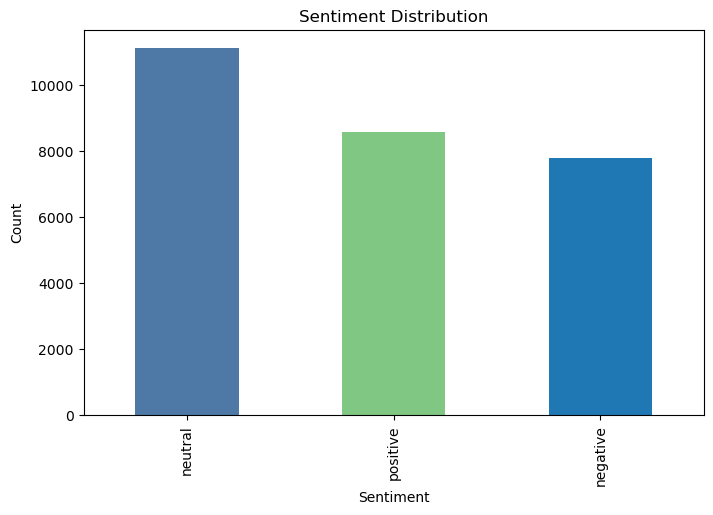

In [33]:
data_main['sentiment'].value_counts().plot.bar(figsize = (8, 5))
import matplotlib.pyplot as plt

sentiment_counts = data_main['sentiment'].value_counts()

# Define colors for each sentiment category
colors = ['#4e79a6', '#81c784', '#1f77b4']


# Create the bar plot with custom colors
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, width=0.5)

# Customize the plot
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

In [34]:
fdist_lemmatized

FreqDist({'get': 2986, 'go': 2804, 'day': 2404, 'good': 1553, 'work': 1453, 'like': 1441, 'love': 1341, 'u': 1200, 'well': 1076, 'today': 1072, ...})

In [35]:
from nltk.probability import FreqDist

# Create a sample FreqDist object
freq_dist = fdist_lemmatized
# Get the most common words and their frequencies
common_words = freq_dist.most_common(20)

# Create a DataFrame from the list of tuples
freq_common_words= pd.DataFrame(common_words, columns=['Common_words', 'count'])

common_words_count = freq_common_words.loc[0:,:]
common_words_count.columns = ['Common_words','count']
common_words_count

Common_words  count
0           get   2986
1            go   2804
2           day   2404
3          good   1553
4          work   1453
5          like   1441
6          love   1341
7             u   1200
8          well   1076
9         today   1072
10         time   1058
11          one   1042
12          see   1003
13         want    982
14         make    981
15        happy    974
16         miss    964
17         know    961
18          lol    936
19       really    904

In [36]:
import plotly.express as px
fig = px.bar(freq_common_words, x="count", y="Common_words", title='Most Common Words', orientation='h', 
             width=700, height=600,color='Common_words')
fig.show()

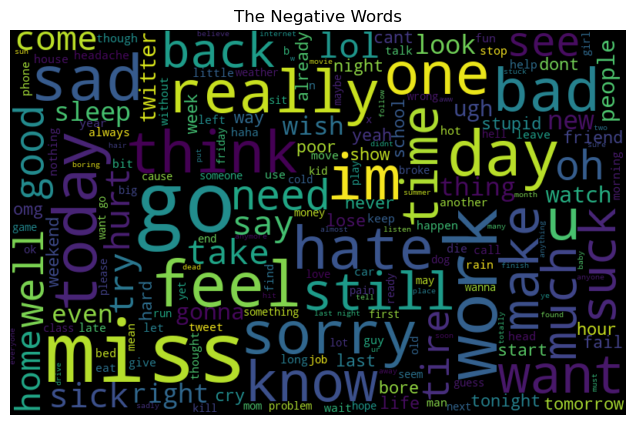

In [37]:
from wordcloud import WordCloud
WordCloud()

sentiment = 'negative'
negative_normal_words = ' '.join(data_main.loc[data_main['sentiment'] == sentiment, 'text'].tolist())

wordcloud = WordCloud(width=800, height=500,random_state = 0,background_color='black',  max_font_size = 110)

wordcloud.generate(negative_normal_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

normal_words
negative_words = word_tokenize(str(normal_words))
negative_word_list = [word for word in negative_words if word.lower() in normal_words]
freq_negative_words = nltk.FreqDist(negative_word_list)
print(freq_negative_words.most_common(20))

In [38]:
negative_words = word_tokenize(str(negative_normal_words))
negative_word_list = [word for word in negative_words if word.lower() in negative_words]
freq_negative_words = nltk.FreqDist(negative_word_list)
print(freq_negative_words.most_common(20))


[('get', 929), ('go', 871), ('miss', 663), ('like', 486), ('work', 483), ('feel', 457), ('day', 406), ('bad', 376), ('sad', 371), ('im', 349), ('sorry', 339), ('really', 337), ('want', 321), ('today', 306), ('one', 300), ('hate', 298), ('make', 287), ('think', 279), ('know', 278), ('u', 278)]


In [39]:
freq_negative_words_list = pd.DataFrame(freq_negative_words.most_common(20), columns=['negative_Common_words', 'count'], index=range(1,21))
negative_common_words_count = freq_negative_words_list.loc[0:,:]
negative_common_words_count

negative_Common_words  count
1                    get    929
2                     go    871
3                   miss    663
4                   like    486
5                   work    483
6                   feel    457
7                    day    406
8                    bad    376
9                    sad    371
10                    im    349
11                 sorry    339
12                really    337
13                  want    321
14                 today    306
15                   one    300
16                  hate    298
17                  make    287
18                 think    279
19                  know    278
20                     u    278

In [40]:
import plotly.express as px
fig = px.bar(negative_common_words_count, x="count", y="negative_Common_words", title='Most  Negative Common Words', orientation='h', 
             width=700, height=600,color='negative_Common_words')
fig.show()

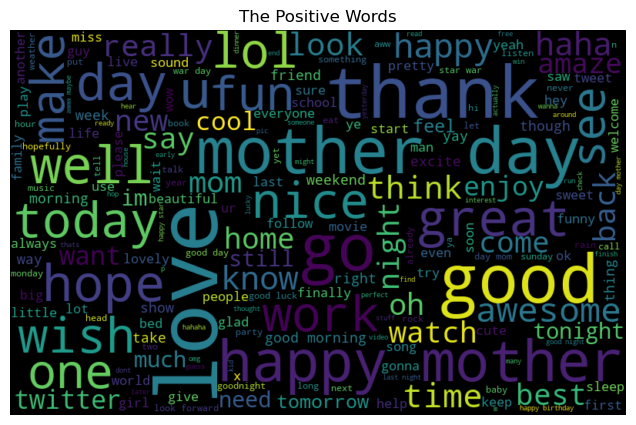

In [41]:
sentiment = 'positive'
positive_normal_words = ' '.join(data_main.loc[data_main['sentiment'] == sentiment, 'text'].tolist())

wordcloud.generate(positive_normal_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [42]:
positive_words = word_tokenize(str(positive_normal_words))
positive_word_list = [word for word in positive_words if word.lower() in positive_words]
freq_positive_words = nltk.FreqDist(positive_word_list)
print(freq_positive_words.most_common(20))


[('day', 1337), ('good', 1046), ('love', 1045), ('happy', 840), ('get', 779), ('go', 687), ('mother', 674), ('thanks', 554), ('great', 486), ('like', 480), ('well', 453), ('u', 431), ('hope', 403), ('see', 345), ('fun', 339), ('work', 337), ('night', 337), ('today', 336), ('time', 335), ('nice', 334)]


In [43]:
freq_positive_words_list = pd.DataFrame(freq_positive_words.most_common(20), columns=['positive_Common_words', 'count'], index=range(1,21))
positive_common_words_count = freq_positive_words_list.loc[0:,:]
positive_common_words_count

positive_Common_words  count
1                    day   1337
2                   good   1046
3                   love   1045
4                  happy    840
5                    get    779
6                     go    687
7                 mother    674
8                 thanks    554
9                  great    486
10                  like    480
11                  well    453
12                     u    431
13                  hope    403
14                   see    345
15                   fun    339
16                  work    337
17                 night    337
18                 today    336
19                  time    335
20                  nice    334

In [44]:
import plotly.express as px
fig = px.bar(positive_common_words_count, x="count", y="positive_Common_words", title='Most  positive Common Words', orientation='h', 
             width=700, height=600,color='positive_Common_words')
fig.show()

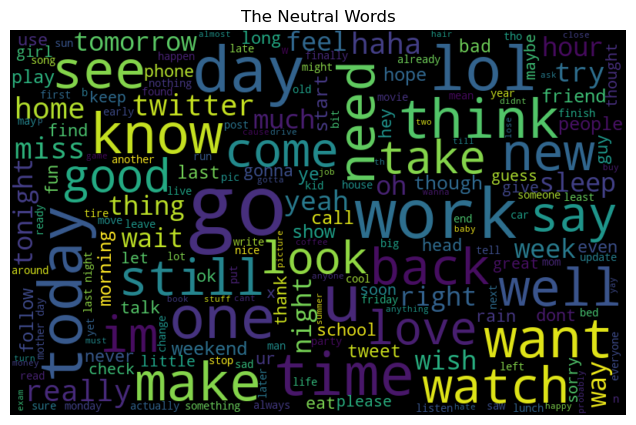

In [45]:
sentiment = 'neutral'
neutral_normal_words = ' '.join(data_main.loc[data_main['sentiment'] == sentiment, 'text'].tolist())

wordcloud.generate(neutral_normal_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [46]:
neutral_words = word_tokenize(str(neutral_normal_words))
neutral_word_list = [word for word in neutral_words if word.lower() in neutral_words]
freq_neutral_words = nltk.FreqDist(neutral_word_list)
print(freq_neutral_words.most_common(20))


[('get', 1278), ('go', 1246), ('day', 661), ('work', 633), ('u', 491), ('like', 475), ('time', 461), ('want', 449), ('lol', 447), ('see', 436), ('today', 430), ('one', 430), ('know', 421), ('back', 408), ('well', 390), ('make', 362), ('think', 351), ('home', 334), ('need', 327), ('new', 323)]


In [47]:
freq_neutral_words_list = pd.DataFrame(freq_neutral_words.most_common(20), columns=['neutral_Common_words', 'count'], index=range(1,21))
neutral_common_words_count = freq_neutral_words_list.loc[0:,:]
neutral_common_words_count

neutral_Common_words  count
1                   get   1278
2                    go   1246
3                   day    661
4                  work    633
5                     u    491
6                  like    475
7                  time    461
8                  want    449
9                   lol    447
10                  see    436
11                today    430
12                  one    430
13                 know    421
14                 back    408
15                 well    390
16                 make    362
17                think    351
18                 home    334
19                 need    327
20                  new    323

In [48]:
import plotly.express as px
fig = px.bar(neutral_common_words_count, x="count", y="neutral_Common_words", title='Most neutral Common Words', orientation='h', 
             width=700, height=600,color='neutral_Common_words')
fig.show()

In [49]:
from nltk import ngrams
# generate bi-grams
negative_bigrams = list(ngrams(negative_words, 2))
print(negative_bigrams[0:20])

[('sooo', 'sad'), ('sad', 'miss'), ('miss', 'san'), ('san', 'diego'), ('diego', 'bos'), ('bos', 'bullying'), ('bullying', 'interview'), ('interview', 'leave'), ('leave', 'alone'), ('alone', 'son'), ('son', 'put'), ('put', 'release'), ('release', 'already'), ('already', 'bought'), ('bought', 'sharpie'), ('sharpie', 'run'), ('run', 'dangerously'), ('dangerously', 'low'), ('low', 'ink'), ('ink', 'want')]


In [50]:
negative_bigrams_word_list = [word for word in negative_bigrams]
negative_bigrams_list = nltk.FreqDist(negative_bigrams_word_list)
print(negative_bigrams_list.most_common(20))

[(('gon', 'na'), 171), (('feel', 'like'), 102), (('wan', 'na'), 96), (('look', 'like'), 54), (('want', 'go'), 53), (('last', 'night'), 50), (('sorry', 'hear'), 40), (('na', 'go'), 39), (('got', 'ta'), 37), (('wish', 'could'), 33), (('feel', 'bad'), 32), (('go', 'miss'), 31), (('make', 'sad'), 31), (('go', 'work'), 29), (('feel', 'well'), 29), (('go', 'home'), 28), (('go', 'bed'), 28), (('na', 'miss'), 27), (('bad', 'day'), 27), (('feel', 'sick'), 25)]


In [51]:
freq_negative_bigrams_list = pd.DataFrame(negative_bigrams_list.most_common(20), columns=['bigrams_negative_words', 'count'], index=range(1,21))
negative_bigrams_words_count = freq_negative_bigrams_list.loc[0:,:]
negative_bigrams_words_count


bigrams_negative_words  count
1               (gon, na)    171
2            (feel, like)    102
3               (wan, na)     96
4            (look, like)     54
5              (want, go)     53
6           (last, night)     50
7           (sorry, hear)     40
8                (na, go)     39
9               (got, ta)     37
10          (wish, could)     33
11            (feel, bad)     32
12             (go, miss)     31
13            (make, sad)     31
14             (go, work)     29
15           (feel, well)     29
16             (go, home)     28
17              (go, bed)     28
18             (na, miss)     27
19             (bad, day)     27
20           (feel, sick)     25

In [52]:
freq_negative_bigrams_list['bigram_str'] = freq_negative_bigrams_list['bigrams_negative_words'].apply(lambda x: ', '.join(x))


In [53]:
freq_negative_bigrams_list

bigrams_negative_words  count   bigram_str
1               (gon, na)    171      gon, na
2            (feel, like)    102   feel, like
3               (wan, na)     96      wan, na
4            (look, like)     54   look, like
5              (want, go)     53     want, go
6           (last, night)     50  last, night
7           (sorry, hear)     40  sorry, hear
8                (na, go)     39       na, go
9               (got, ta)     37      got, ta
10          (wish, could)     33  wish, could
11            (feel, bad)     32    feel, bad
12             (go, miss)     31     go, miss
13            (make, sad)     31    make, sad
14             (go, work)     29     go, work
15           (feel, well)     29   feel, well
16             (go, home)     28     go, home
17              (go, bed)     28      go, bed
18             (na, miss)     27     na, miss
19             (bad, day)     27     bad, day
20           (feel, sick)     25   feel, sick

In [54]:
import plotly.express as px
negative_bigrams_words_count.dropna(inplace=True)
freq_negative_bigrams_list = freq_negative_bigrams_list.sort_values(by='count', ascending=True)
fig = px.bar(freq_negative_bigrams_list, x="count", y="bigram_str", title='Most Common negative bigram Words', orientation='h', 
             width=700, height=600,color='bigrams_negative_words')
fig.show()

In [55]:
from nltk import ngrams
# generate bi-grams
positive_bigrams = list(ngrams(positive_words, 2))
print(positive_bigrams[0:20])

[('feeding', 'baby'), ('baby', 'fun'), ('fun', 'smile'), ('smile', 'coo'), ('coo', 'journey'), ('journey', 'u'), ('u', 'become'), ('become', 'cooler'), ('cooler', 'possible'), ('possible', 'really'), ('really', 'really'), ('really', 'like'), ('like', 'song'), ('song', 'love'), ('love', 'story'), ('story', 'taylor'), ('taylor', 'swift'), ('swift', 'play'), ('play', 'ghost'), ('ghost', 'online')]


In [56]:
positive_bigrams_word_list = [word for word in positive_bigrams]
positive_bigrams_list = nltk.FreqDist(positive_bigrams_word_list)
print(positive_bigrams_list.most_common(20))

[(('mother', 'day'), 546), (('happy', 'mother'), 442), (('good', 'morning'), 142), (('gon', 'na'), 101), (('day', 'mom'), 70), (('star', 'war'), 69), (('wish', 'could'), 69), (('good', 'luck'), 67), (('look', 'forward'), 62), (('war', 'day'), 60), (('good', 'day'), 60), (('happy', 'birthday'), 57), (('last', 'night'), 56), (('happy', 'star'), 53), (('good', 'night'), 53), (('wan', 'na'), 51), (('day', 'mother'), 51), (('great', 'day'), 47), (('really', 'good'), 45), (('star', 'trek'), 43)]


In [57]:
freq_positive_bigrams_list = pd.DataFrame(positive_bigrams_list.most_common(20), columns=['bigrams_positive_words', 'count'], index=range(1,21))
positive_bigrams_words_count = freq_positive_bigrams_list.loc[0:,:]
positive_bigrams_words_count


bigrams_positive_words  count
1           (mother, day)    546
2         (happy, mother)    442
3         (good, morning)    142
4               (gon, na)    101
5              (day, mom)     70
6             (star, war)     69
7           (wish, could)     69
8            (good, luck)     67
9         (look, forward)     62
10             (war, day)     60
11            (good, day)     60
12      (happy, birthday)     57
13          (last, night)     56
14          (happy, star)     53
15          (good, night)     53
16              (wan, na)     51
17          (day, mother)     51
18           (great, day)     47
19         (really, good)     45
20           (star, trek)     43

In [58]:
freq_positive_bigrams_list['bigram_str_positive'] = freq_positive_bigrams_list['bigrams_positive_words'].apply(lambda x: ', '.join(x))


In [59]:
freq_positive_bigrams_list

bigrams_positive_words  count bigram_str_positive
1           (mother, day)    546         mother, day
2         (happy, mother)    442       happy, mother
3         (good, morning)    142       good, morning
4               (gon, na)    101             gon, na
5              (day, mom)     70            day, mom
6             (star, war)     69           star, war
7           (wish, could)     69         wish, could
8            (good, luck)     67          good, luck
9         (look, forward)     62       look, forward
10             (war, day)     60            war, day
11            (good, day)     60           good, day
12      (happy, birthday)     57     happy, birthday
13          (last, night)     56         last, night
14          (happy, star)     53         happy, star
15          (good, night)     53         good, night
16              (wan, na)     51             wan, na
17          (day, mother)     51         day, mother
18           (great, day)     47          great, day
19         (really, good)     45        really, good
20           (star, trek)     43          star, trek

In [60]:
import plotly.express as px
freq_positive_bigrams_list.dropna(inplace=True)
fig = px.bar(freq_positive_bigrams_list, x="count", y="bigram_str_positive", title='Most Common positive bigram Words', orientation='h', 
             width=700, height=600,color='bigram_str_positive')
fig.show()

In [61]:
from nltk import ngrams
# generate bi-grams
neutral_bigrams = list(ngrams(neutral_words, 2))
print(neutral_bigrams[0:20])

[('respond', 'go'), ('go', 'shameless'), ('shameless', 'plug'), ('plug', 'best'), ('best', 'ranger'), ('ranger', 'forum'), ('forum', 'earth'), ('earth', 'soooo'), ('soooo', 'high'), ('high', 'much'), ('much', 'love'), ('love', 'hopeful'), ('hopeful', 'reckon'), ('reckon', 'chance'), ('chance', 'minimal'), ('minimal', 'p'), ('p', 'never'), ('never', 'gon'), ('gon', 'na'), ('na', 'get')]


In [62]:
neutral_bigrams_word_list = [word for word in neutral_bigrams]
neutral_bigrams_list = nltk.FreqDist(neutral_bigrams_word_list)
print(neutral_bigrams_list.most_common(20))

[(('gon', 'na'), 161), (('wan', 'na'), 102), (('got', 'ta'), 75), (('mother', 'day'), 72), (('last', 'night'), 67), (('look', 'like'), 59), (('get', 'ready'), 56), (('want', 'go'), 54), (('next', 'week'), 51), (('get', 'back'), 51), (('go', 'bed'), 48), (('na', 'go'), 46), (('go', 'home'), 43), (('feel', 'like'), 42), (('last', 'day'), 41), (('go', 'see'), 38), (('go', 'get'), 37), (('get', 'home'), 37), (('wish', 'could'), 36), (('go', 'back'), 35)]


In [63]:
freq_neutral_bigrams_list = pd.DataFrame(neutral_bigrams_list.most_common(20), columns=['bigrams_neutral_words', 'count'], index=range(1,21))
neutral_bigrams_words_count = freq_neutral_bigrams_list.loc[0:,:]
neutral_bigrams_words_count


bigrams_neutral_words  count
1              (gon, na)    161
2              (wan, na)    102
3              (got, ta)     75
4          (mother, day)     72
5          (last, night)     67
6           (look, like)     59
7           (get, ready)     56
8             (want, go)     54
9           (next, week)     51
10           (get, back)     51
11             (go, bed)     48
12              (na, go)     46
13            (go, home)     43
14          (feel, like)     42
15           (last, day)     41
16             (go, see)     38
17             (go, get)     37
18           (get, home)     37
19         (wish, could)     36
20            (go, back)     35

In [64]:
freq_neutral_bigrams_list['bigram_str_neutral'] = freq_neutral_bigrams_list['bigrams_neutral_words'].apply(lambda x: ', '.join(x))


In [65]:
freq_neutral_bigrams_list

bigrams_neutral_words  count bigram_str_neutral
1              (gon, na)    161            gon, na
2              (wan, na)    102            wan, na
3              (got, ta)     75            got, ta
4          (mother, day)     72        mother, day
5          (last, night)     67        last, night
6           (look, like)     59         look, like
7           (get, ready)     56         get, ready
8             (want, go)     54           want, go
9           (next, week)     51         next, week
10           (get, back)     51          get, back
11             (go, bed)     48            go, bed
12              (na, go)     46             na, go
13            (go, home)     43           go, home
14          (feel, like)     42         feel, like
15           (last, day)     41          last, day
16             (go, see)     38            go, see
17             (go, get)     37            go, get
18           (get, home)     37          get, home
19         (wish, could)     36        wish, could
20            (go, back)     35           go, back

In [66]:
import plotly.express as px
freq_neutral_bigrams_list.dropna(inplace=True)
fig = px.bar(freq_neutral_bigrams_list, x="count", y="bigram_str_neutral", title='Most Common neutral bigram Words', orientation='h', 
             width=700, height=600,color='bigram_str_neutral')
fig.show()

# Models

In [67]:
from sklearn.metrics import classification_report, accuracy_score

In [68]:
from sklearn.model_selection import train_test_split

# select the columns you want to use as features
X_train = data_main_train[['text','Time of Tweet', 'Age of User', 'Country']].values
#X_train = data_main_train['text'].values
X_test = data_main_test[['text','Time of Tweet', 'Age of User', 'Country']].values
#X_test = data_main_test['text'].values
y_train = data_main_train['sentiment'].values
y_test = data_main_test['sentiment'].values

# split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

# print the shapes of the resulting arrays
print('X_train shape:', X_train1.shape)
print('X_test shape:', X_test1.shape)
print('y_train shape:', y_train1.shape)
print('y_test shape:', y_test1.shape)


X_train shape: (23358, 4)
X_test shape: (4122, 4)
y_train shape: (23358,)
y_test shape: (4122,)


In [69]:
X_train_as_a_list = [' '.join(x) for x in X_train1.tolist()]
X_test_as_a_list = [' '.join(x) for x in X_test1.tolist()]

In [70]:
X_train_as_a_list

['happy friday u know get copy bt art u mel fake twitter n find thx noon 60-70 Bulgaria',
 'yea really noon 21-30 Botswana',
 'idk song noon 21-30 Luxembourg',
 'good industry plan go far away ohio hate night 31-45 Saint Lucia',
 'actually sweden ikea room stay night though stay across street night 31-45 Tonga',
 'today geez get ready graduation night 31-45 Finland',
 'boo come watch telenovelas braid others hair morning 46-60 Burundi',
 'hate weather suck want go tonight n mess like noon 21-30 Bhutan',
 'gotta show monday hopefully head well night 31-45 Bolivia',
 'sorry understand people expect everyone react thing poise night 31-45 Finland',
 'get back pool need ice knee noon 21-30 Uruguay',
 ' noon 21-30 Gabon',
 'bed watch rove night 31-45 United Kingdom',
 'alright gang gotta go park family hour back mwahs yu head bed night 31-45 Algeria',
 'already miss biddy bop home mom night watch little bro get rest birthday party tomorrow night 70-100 Guatemala',
 'dont think ganna text mor

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
Vectorized_X_train = vectorizer.fit_transform(X_train_as_a_list)
Vectorized_X_test = vectorizer.transform(X_test_as_a_list)
print(Vectorized_X_train)

  (0, 627)	0.25389280596332015
  (0, 8)	0.08619601434726595
  (0, 7)	0.086116937240986
  (0, 3063)	0.08602224530634925
  (0, 4448)	0.3092753122153225
  (0, 1609)	0.23374169947169454
  (0, 4603)	0.202142798266915
  (0, 1533)	0.3353886655031511
  (0, 2799)	0.38049708930172854
  (0, 229)	0.31724725270131793
  (0, 614)	0.35560948246448054
  (0, 955)	0.31050105866590305
  (0, 1801)	0.1345250400829935
  (0, 2490)	0.17975349578895858
  (0, 1720)	0.24247440624669858
  (0, 1992)	0.17934341041461435
  (1, 546)	0.5486919821217414
  (1, 3)	0.24667386275417474
  (1, 2)	0.24667386275417474
  (1, 3569)	0.3976096184916141
  (1, 4956)	0.6202200178252506
  (1, 3063)	0.1856740164777573
  (2, 2679)	0.5104948364376694
  (2, 4057)	0.477137332134366
  (2, 2210)	0.6155778154088505
  :	:
  (23355, 4064)	0.24304774458449638
  (23355, 3272)	0.24190342484156924
  (23355, 1859)	0.2317232786531856
  (23355, 4195)	0.4230778051060865
  (23355, 3784)	0.16598200309402558
  (23355, 4702)	0.2225347979635963
  (23355, 440

In [72]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
svc = LinearSVC()
svc.fit(Vectorized_X_train,y_train1)
#y_train_pred = svc.predict(X_train)
svc_y_test_pred = svc.predict(Vectorized_X_test)
#metrics(y_train,y_train_pred,y_test,y_test_pred)
svc_test_acc = accuracy_score(y_test1, svc_y_test_pred)
svc_test_prec = precision_score(y_test1, svc_y_test_pred, average='macro')
svc_test_recall = recall_score(y_test1, svc_y_test_pred, average='macro')
svc_test_acc, svc_test_prec, svc_test_recall 

(0.6761280931586608, 0.676863331803847, 0.6712547652869681)

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(Vectorized_X_train, y_train1)

# Make predictions on the testing data
rf_y_pred = rf.predict(Vectorized_X_test)

# Calculate the accuracy of the model
rf_test_acc = accuracy_score(y_test1, rf_y_pred)
rf_test_prec = precision_score(y_test1, rf_y_pred, average='macro')
rf_test_recall = recall_score(y_test1, rf_y_pred, average='macro')
print('Random Forest Test Accuracy:', rf_test_acc)
rf_test_prec, rf_test_recall

Random Forest Test Accuracy: 0.6809801067442989


(0.6881619156974293, 0.6692408275775431)

In [74]:
from sklearn.neighbors import KNeighborsClassifier


# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Vectorized_X_train, y_train1)

# Predict test set labels
knn_y_test_pred = knn.predict(Vectorized_X_test)

# Evaluate performance
knn_test_acc = accuracy_score(y_test1, knn_y_test_pred)
knn_test_prec = precision_score(y_test1, knn_y_test_pred, average='macro')
knn_test_recall = recall_score(y_test1, knn_y_test_pred, average='macro')
print(f"KNN accuracy: {knn_test_acc:}")
knn_test_prec, knn_test_recall

KNN accuracy: 0.442988840368753


(0.449195798576526, 0.41971069755587287)

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a decision tree classifier with some hyperparameters
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Train the model on the training data
tree.fit(Vectorized_X_train, y_train1)

# Make predictions on the testing data
tree_y_pred = tree.predict(Vectorized_X_test)

# Evaluate the accuracy of the model
tree_accuracy = accuracy_score(y_test1, tree_y_pred)
tree_prec = precision_score(y_test1, tree_y_pred, average='macro')
tree_recall = recall_score(y_test1, tree_y_pred, average='macro')

print("Accuracy:", tree_accuracy)
tree_prec, tree_recall

Accuracy: 0.5254730713245997


(0.652504759399687, 0.4612048113091312)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform your text data into a matrix of token counts
count_Vectorized_X_train = vectorizer.fit_transform(X_train_as_a_list)
count_Vectorized_X_test = vectorizer.transform(X_test_as_a_list)
print(count_Vectorized_X_train)

  (0, 6922)	1
  (0, 5988)	1
  (0, 8714)	1
  (0, 6289)	1
  (0, 3471)	1
  (0, 2190)	1
  (0, 871)	1
  (0, 9912)	1
  (0, 5409)	1
  (0, 16346)	1
  (0, 5626)	1
  (0, 15768)	1
  (0, 10927)	1
  (0, 7)	1
  (0, 8)	1
  (0, 2250)	1
  (1, 10927)	1
  (1, 17772)	1
  (1, 12820)	1
  (1, 2)	1
  (1, 3)	1
  (1, 1959)	1
  (2, 10927)	1
  (2, 2)	1
  (2, 3)	1
  :	:
  (23355, 13605)	1
  (23355, 14925)	2
  (23355, 6477)	1
  (23355, 11798)	1
  (23355, 14521)	1
  (23355, 5419)	2
  (23355, 6980)	1
  (23355, 11889)	1
  (23355, 17861)	1
  (23356, 10339)	2
  (23356, 1)	1
  (23356, 8898)	1
  (23356, 3933)	1
  (23356, 3716)	1
  (23356, 9385)	1
  (23357, 7)	1
  (23357, 10339)	1
  (23357, 6)	1
  (23357, 15358)	1
  (23357, 12798)	2
  (23357, 10972)	1
  (23357, 12594)	1
  (23357, 17643)	1
  (23357, 4815)	1
  (23357, 10901)	1


In [77]:
svc = LinearSVC()
svc.fit(count_Vectorized_X_train,y_train1)
#y_train_pred = svc.predict(X_train)
count_svc_y_test_pred = svc.predict(count_Vectorized_X_test)
#metrics(y_train,y_train_pred,y_test,y_test_pred)
count_svc_test_acc = accuracy_score(y_test1, count_svc_y_test_pred)
count_svc_test_prec = precision_score(y_test1, count_svc_y_test_pred, average='macro')
count_svc_test_recall = recall_score(y_test1, count_svc_y_test_pred, average='macro')
count_svc_test_acc, count_svc_test_prec, count_svc_test_recall 


(0.655992236778263, 0.6563081889552621, 0.6522563694190576)

In [78]:
# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(count_Vectorized_X_train, y_train1)

# Make predictions on the testing data
count_rf_y_pred = rf.predict(count_Vectorized_X_test)

# Calculate the accuracy of the model
count_rf_test_acc = accuracy_score(y_test1, count_rf_y_pred)
count_rf_test_prec = precision_score(y_test1, count_rf_y_pred, average='macro')
count_rf_test_recall = recall_score(y_test1, count_rf_y_pred, average='macro')
print('Random Forest Test Accuracy:', count_rf_test_acc)
count_rf_test_prec, count_rf_test_recall

Random Forest Test Accuracy: 0.6899563318777293


(0.6932616851790628, 0.6833413358748196)

In [79]:
from sklearn.neighbors import KNeighborsClassifier


# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(count_Vectorized_X_train, y_train1)

# Predict test set labels
count_knn_y_test_pred = knn.predict(count_Vectorized_X_test)

# Evaluate performance
count_knn_test_acc = accuracy_score(y_test1, count_knn_y_test_pred)
count_knn_test_prec = precision_score(y_test1, count_knn_y_test_pred, average='macro')
count_knn_test_recall = recall_score(y_test1, count_knn_y_test_pred, average='macro')
print(f"KNN accuracy: {count_knn_test_acc:}")
count_knn_test_prec, count_knn_test_recall

KNN accuracy: 0.4398350315380883


(0.4585266017978776, 0.40683738654510054)

In [80]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a decision tree classifier with some hyperparameters
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Train the model on the training data
tree.fit(count_Vectorized_X_train, y_train1)

# Make predictions on the testing data
count_tree_y_pred = tree.predict(count_Vectorized_X_test)

# Evaluate the accuracy of the model
count_tree_accuracy = accuracy_score(y_test1, count_tree_y_pred)
count_tree_prec = precision_score(y_test1, count_tree_y_pred, average='macro')
count_tree_recall = recall_score(y_test1, count_tree_y_pred, average='macro')
print("Accuracy:", count_tree_accuracy)
count_tree_prec, count_tree_recall

Accuracy: 0.5264434740417273


(0.6542191367537902, 0.4623952874996074)

In [81]:
models = {
    'Linear SVC': svc_test_acc,
    'Random Forest': rf_test_acc,
    'KNN': knn_test_acc,
    'Decision Tree': tree_accuracy
}

model_accuracy_tfidf = pd.DataFrame(models.items(), columns=['Model', 'Accuracy'])

In [82]:
model_accuracy_tfidf['Approach'] = "TF-IDF"
model_accuracy_tfidf

Model  Accuracy Approach
0     Linear SVC  0.676128   TF-IDF
1  Random Forest  0.680980   TF-IDF
2            KNN  0.442989   TF-IDF
3  Decision Tree  0.525473   TF-IDF

In [83]:
models = {
    'Linear SVC': count_svc_test_acc,
    'Random Forest': count_rf_test_acc,
    'KNN': count_knn_test_acc,
    'Decision Tree': count_tree_accuracy
}

model_bag_of_words = pd.DataFrame(models.items(), columns=['Model', 'Accuracy'])


In [84]:
model_bag_of_words['Approach'] = "Bag-Of-Words"
model_bag_of_words

Model  Accuracy      Approach
0     Linear SVC  0.655992  Bag-Of-Words
1  Random Forest  0.689956  Bag-Of-Words
2            KNN  0.439835  Bag-Of-Words
3  Decision Tree  0.526443  Bag-Of-Words

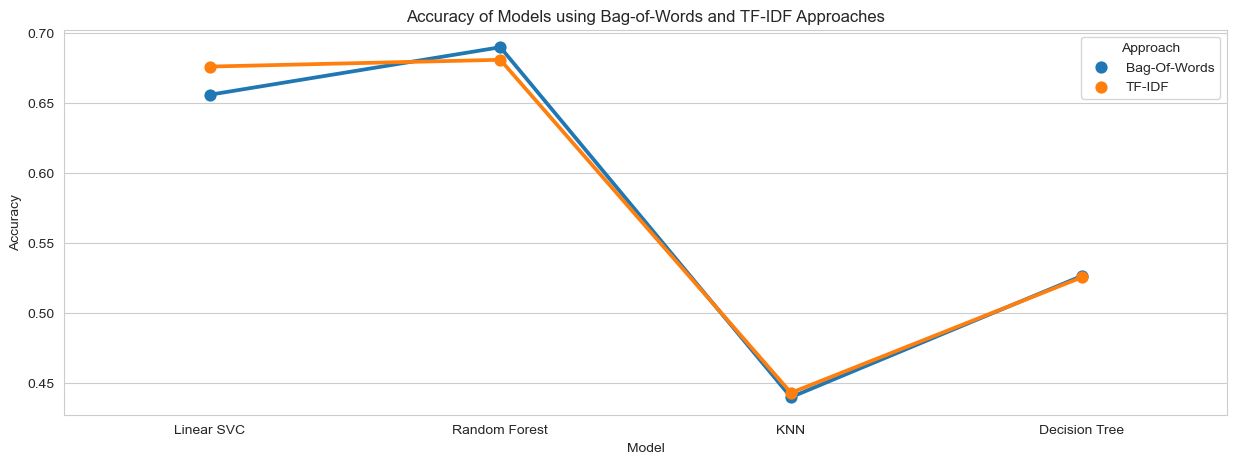

In [96]:
# Concatenate the two dataframes and reset index
df = pd.concat([model_bag_of_words, model_accuracy_tfidf])

# plot line plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
#sns.lineplot(x='Model', y='Accuracy', hue = 'Approach',style ='Approach',data=df, markers=True)
sns.pointplot(x='Model', y='Accuracy',hue = 'Approach',data=df)
plt.title('Accuracy of Models using Bag-of-Words and TF-IDF Approaches')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [89]:
model_names = ['Linear SVC', 'Random Forest', 'KNN', 'Decision Tree']

test_accuracy = [svc_test_acc, rf_test_acc, knn_test_acc, tree_accuracy]

test_precision = [svc_test_prec, rf_test_prec, knn_test_prec, tree_prec]

test_recall = [svc_test_recall, rf_test_recall, knn_test_recall, tree_recall]

model_tfidf = pd.DataFrame({'Model_TF-IDF': model_names, 'Test Accuracy': test_accuracy, 'Test Precision': test_precision, 'Test Recall': test_recall })


In [90]:
model_tfidf

Model_TF-IDF  Test Accuracy  Test Precision  Test Recall
0     Linear SVC       0.676128        0.676863     0.671255
1  Random Forest       0.680980        0.688162     0.669241
2            KNN       0.442989        0.449196     0.419711
3  Decision Tree       0.525473        0.652505     0.461205

In [91]:
model_tfidf['Approach'] = "TF-IDF"
model_tfidf

Model_TF-IDF  Test Accuracy  Test Precision  Test Recall Approach
0     Linear SVC       0.676128        0.676863     0.671255   TF-IDF
1  Random Forest       0.680980        0.688162     0.669241   TF-IDF
2            KNN       0.442989        0.449196     0.419711   TF-IDF
3  Decision Tree       0.525473        0.652505     0.461205   TF-IDF

In [92]:
model_names = ['Linear SVC','Random Forest', 'KNN', 'Decision Tree']

count_test_accuracy = [count_svc_test_acc, count_rf_test_acc, count_knn_test_acc, count_tree_accuracy]

count_test_precision = [count_svc_test_prec, count_rf_test_prec, count_knn_test_prec, count_tree_prec]

count_test_recall = [count_svc_test_recall, count_rf_test_recall, count_knn_test_recall, count_tree_recall]

model_bow = pd.DataFrame({'Model_BOW': model_names, 'Test Accuracy': count_test_accuracy, 'Test Precision': count_test_precision, 'Test Recall': count_test_recall })


In [93]:
model_bow

Model_BOW  Test Accuracy  Test Precision  Test Recall
0     Linear SVC       0.655992        0.656308     0.652256
1  Random Forest       0.689956        0.693262     0.683341
2            KNN       0.439835        0.458527     0.406837
3  Decision Tree       0.526443        0.654219     0.462395

In [94]:
model_bow['Approach'] = "Bag-Of-Words"
model_bow

Model_BOW  Test Accuracy  Test Precision  Test Recall      Approach
0     Linear SVC       0.655992        0.656308     0.652256  Bag-Of-Words
1  Random Forest       0.689956        0.693262     0.683341  Bag-Of-Words
2            KNN       0.439835        0.458527     0.406837  Bag-Of-Words
3  Decision Tree       0.526443        0.654219     0.462395  Bag-Of-Words